C:\Users\SE79065\AppData\Local\Temp/ipykernel_5696/925923871.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='k',LineWidth=2,label='Ruidosa')
C:\Users\SE79065\AppData\Local\Temp/ipykernel_5696/925923871.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Señal completa')
C:\Users\SE79065\Miniconda3\envs\cvx\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


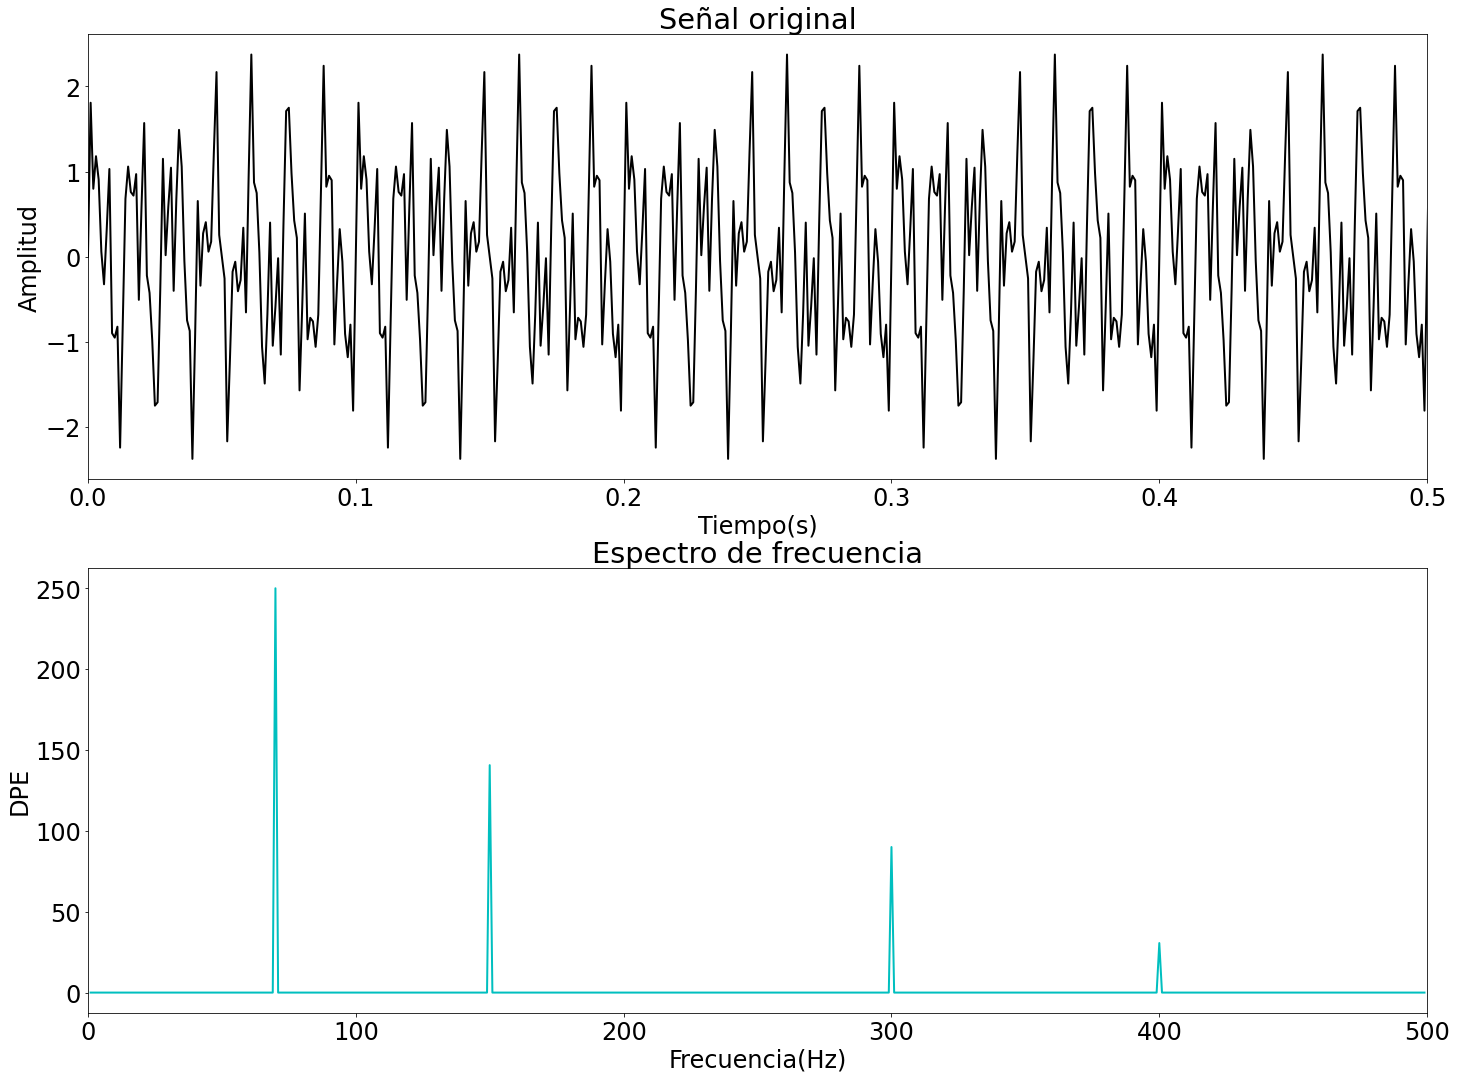

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

plt.rcParams['figure.figsize'] = [24,18]
plt.rcParams.update({'font.size':24})

#Creamos una señal f como suma de 4 funciones sinusoidales

dt = 0.001
t = np.arange(0,1,dt)
n = len(t)
f = np.sin(2*np.pi*70*t) + 0.75*np.sin(2*np.pi*150*t)+ 0.6*np.sin(2*np.pi*300*t) + 0.35*np.sin(2*np.pi*400*t) 
#Hallamos su transformada de Fourier y su espectro de frecuencias
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')


fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
#plt.plot(t,f,color='k',LineWidth=2,label='Limpia')
plt.plot(t,f,color='k',LineWidth=2,label='Ruidosa')
plt.xlim(0,0.5)
plt.title('Señal original')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Señal completa')
plt.xlim(0,500)
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('DPE')
plt.show()

C:\Users\SE79065\AppData\Local\Temp/ipykernel_3864/509814472.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='k',LineWidth=2,label='Señal completa')
C:\Users\SE79065\AppData\Local\Temp/ipykernel_3864/509814472.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t2,f2,color='r',marker='x',LineWidth=0,ms=12,mew=4,label='Captación')


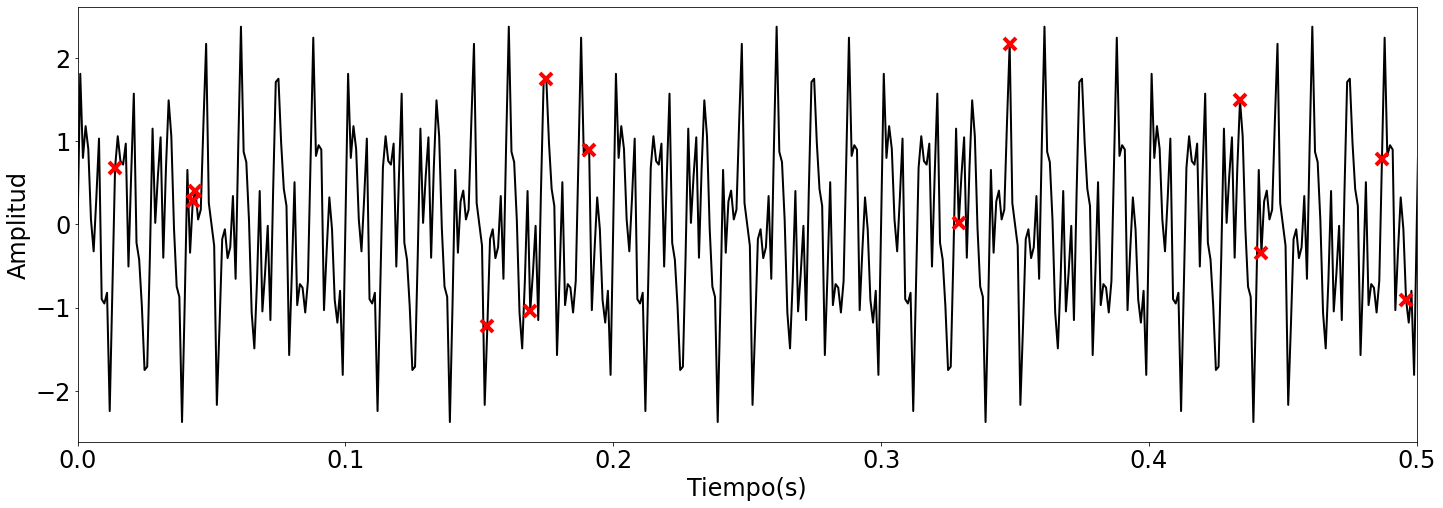

In [10]:
#Captación aleatoria del orden de Klog(n/K), donde K=4(dispersión), n=1000(muestras) (+-23 samples)
m = 30
ri = np.random.choice(n,m,replace=False)
ri.sort()
t2=t[ri]
f2=f[ri]
plt.figure(figsize=(24,8))
plt.plot(t,f,color='k',LineWidth=2,label='Señal completa')
plt.plot(t2,f2,color='r',marker='x',LineWidth=0,ms=12,mew=4,label='Captación')
plt.xlim(0,0.5)
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.show()

In [12]:
#Definimos la matriz \Theta = \Phi\Psi 
Phi = np.identity(n)
T = np.fft.ifft(Phi, axis=0, norm='ortho')
Theta = T[ri]
np.shape(Theta)

(30, 1000)

In [13]:
#Minimizacion l_1
alpha = cvx.Variable(n)
objetivo = cvx.Minimize(cvx.norm(alpha,1))
rest = [Theta@alpha == f2]
prob = cvx.Problem(objetivo, rest)
result = prob.solve(verbose=True)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Sep 07 03:00:36 PM: Your problem has 1000 variables, 1 constraints, and 0 parameters.
(CVXPY) Sep 07 03:00:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 07 03:00:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 07 03:00:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 07 03:00:36 PM: Compiling problem (target solver=ECOS).
(CVXPY) Sep 07 03:00:36 PM: Reduction chain: Complex2Real -> Dcp2Cone -> CvxAttr2Constr -> Con

In [14]:
#minimizacion l_2
alpha_2 = cvx.Variable(n)
objetivo_2 = cvx.Minimize(cvx.norm(alpha_2,2))
rest_2 = [T@alpha_2 == f2]
prob_2 = cvx.Problem(objetivo_2, rest_2)
result_2 = prob_2.solve(verbose=True)

ValueError: Cannot broadcast dimensions  (1000,) (30,)

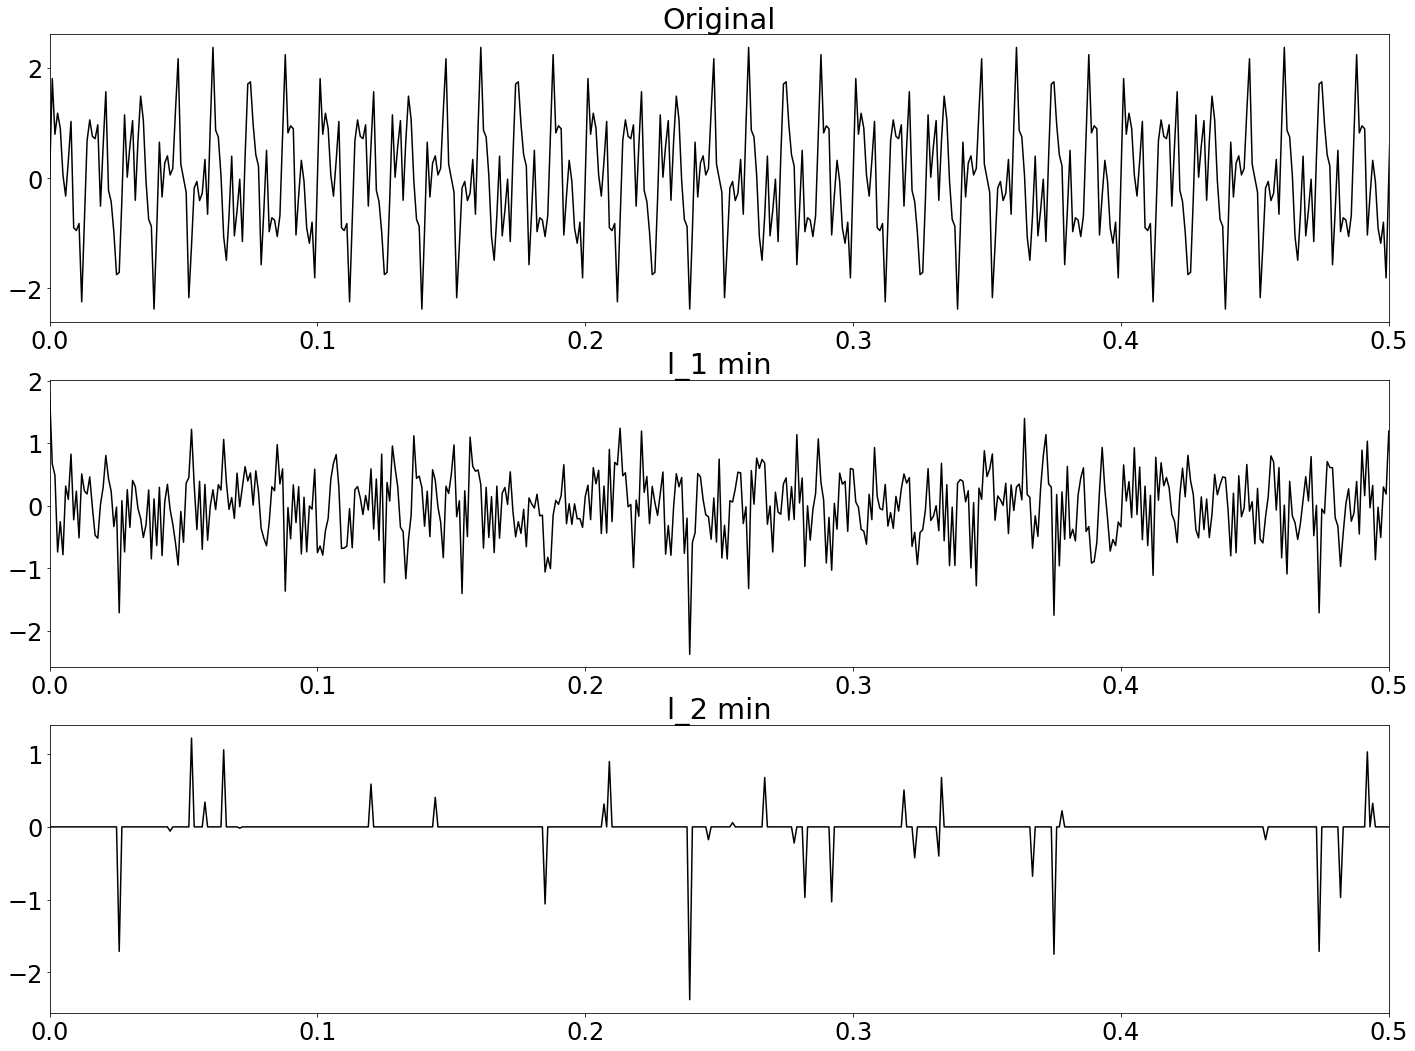

In [43]:
#Devolvemos los datos al dominio temporal
x = np.array(alpha.value)
x = np.squeeze(x)
sig = np.fft.ifft(x, axis=0, norm='ortho')
z = np.array(alpha_2.value)
z = np.squeeze(z)
sig_2 = np.fft.ifft(z, axis=0, norm='ortho')

fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,'k')
plt.xlim(0,0.5)
plt.title('Original')

plt.sca(axs[1])
plt.plot(t,np.real(sig),'k')
plt.xlim(0,0.5)
plt.title('l_1 min')

plt.sca(axs[2])
plt.plot(t,np.real(sig_2),'k')
plt.xlim(0,0.5)
plt.title('l_2 min')

plt.show()